<h1>1. Introduction

Exploring a dataset from a multinational consultancy firm to analyze and predict employee attrition based on various attributes collected over a certain period.

<h1>2. Importing Necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

<h1>3. Loading the Dataset

Importing our Dataset and setting the Employee Number as the index

In [2]:
df = pd.read_csv('HR_DS.csv')
df.set_index('EmployeeNumber', inplace=True)

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,2,80,1,6,0,3,6,2,0,3


<h1> 3. Preliminary Data Analysis

Data Dimensions / Data Types / Missing Values

In [4]:
df.shape

(1470, 34)

In [5]:
df.duplicated().any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   147

<h1> 4. Exploratory Data Analysis (EDA)

In [7]:
# Set the max rows and columns to display
pd.options.display.max_rows = len(df)
pd.options.display.max_columns = len(df.columns)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeeCount and StandardHours have a standard deviation of 0, meaning that the values are the same in every row.
<p>EmployeeCount = 0
<p>StandardHours = 80
<p> We will drop this variables

In [9]:
#df.drop(columns=["EmployeeCount"], inplace=True) 
#df.drop(columns=["StandardHours"], inplace=True)

In [10]:
# Reset max_rows and max_columns options to their default values
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [11]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Over18 has only 1 value. We will drop this variable.

In [12]:
#df.drop(columns=["Over18"], inplace=True)

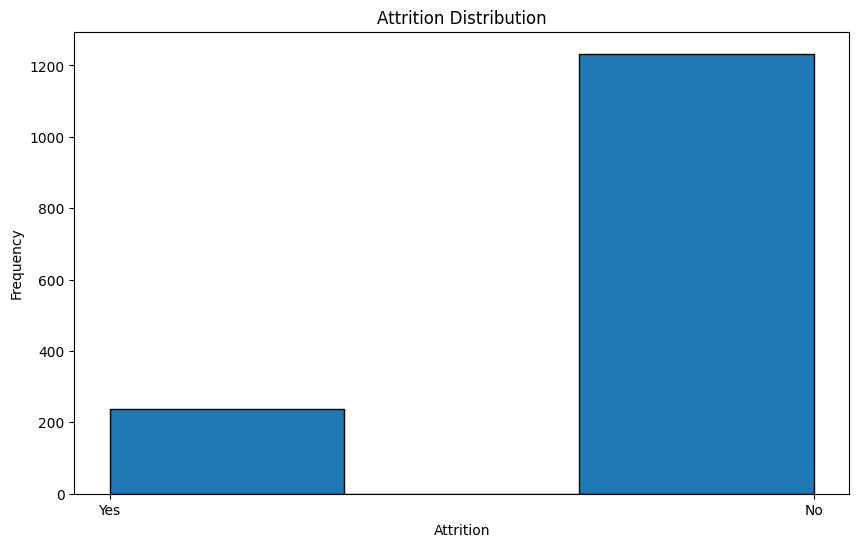

In [13]:
#Distribution of Attrition

#convert categorical "Attrition" variable into a numerical one
label_encoder = LabelEncoder()
df['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])

#Attrition YES = 237 employees ---> TOTAL WORKERS(1470) - ATTRITION WORKS "NO"(1233) = 237 ATTRITION WORKERS "YES"
plt.figure(figsize=(10, 6))
plt.hist(df['Attrition'], bins=3, edgecolor='black')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.title('Attrition Distribution')
plt.show()

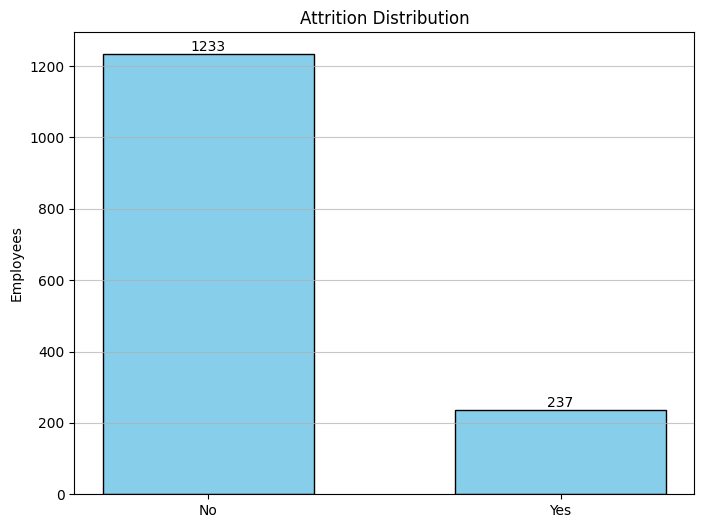

In [14]:
# Convert categorical "Attrition" variable into a numerical one
label_encoder = LabelEncoder()
df['Attrition_encoded'] = label_encoder.fit_transform(df['Attrition'])


plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['Attrition_encoded'], bins=2, edgecolor='black', color='skyblue', align='left', rwidth=0.6)
plt.xticks([0, 0.5], ['No', 'Yes'])
plt.xlabel('')
plt.ylabel('Employees')
plt.title('Attrition Distribution')
plt.grid(axis='y', linestyle='-', alpha=0.7)

# Annotate the bars with counts
for i in range(2):
    plt.annotate(int(n[i]), (bins[i], n[i]), ha='center', va='bottom')

plt.show()


In [15]:
# Calculate the average of the Age
average_age = df['Age'].mean()
print("Average Age:", average_age)


# Calculate the average age for employees with "Attrition" equal to "Yes"
average_age_yes = df[df['Attrition'] == 'Yes']['Age'].mean()

# Calculate the average age for employees with "Attrition" equal to "No"
average_age_no = df[df['Attrition'] == 'No']['Age'].mean()

print("Average Age for Attrition 'Yes':", average_age_yes)
print("Average Age for Attrition 'No':", average_age_no)

Average Age: 36.923809523809524
Average Age for Attrition 'Yes': 33.607594936708864
Average Age for Attrition 'No': 37.561232765612324


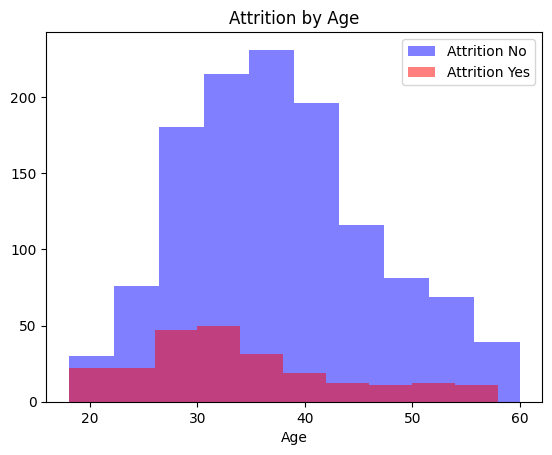

In [16]:
#Attrition by Age

# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']
# Create histograms for both groups
plt.hist(attrition_no, bins=10, alpha=0.5, label='Attrition No', color='blue')
plt.hist(attrition_yes, bins=10, alpha=0.5, label='Attrition Yes', color='red')

plt.xlabel('Age')
plt.ylabel('')
plt.title('Attrition by Age')
plt.legend()
plt.show()

# Yes attrition - pico de trabalhadores entre os 25-35 anos
# No attrition - pico de trabalhadores entre os 30-40 anos
# quem sai da empresa geralmente são os mais jovens 
#(procurar melhores oportunidades, mais valiosos no mercado, menos medo de arriscar?) 

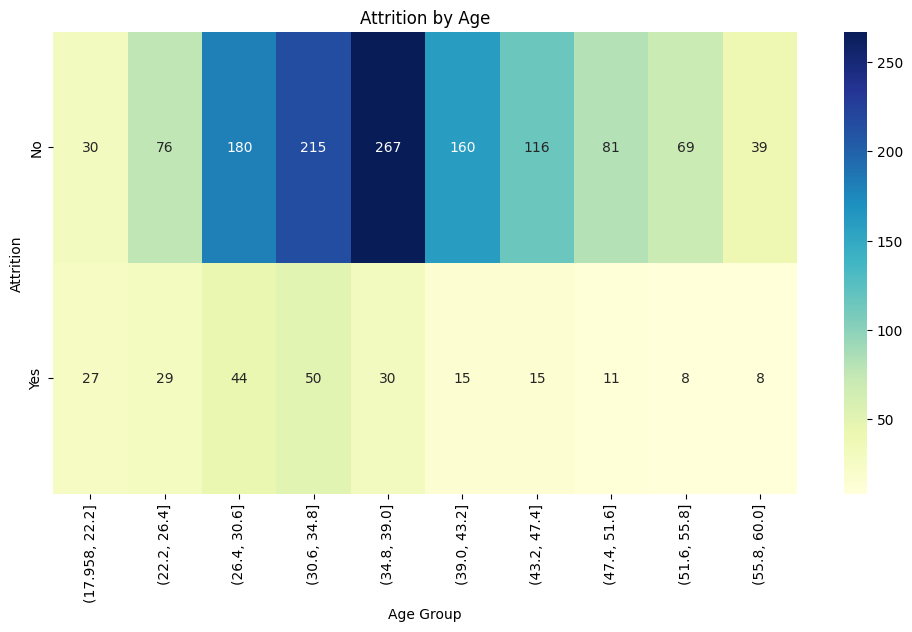

In [67]:
# Create a binned age column
df['Age_bin'] = pd.cut(df['Age'], bins=10)

# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='Attrition', columns='Age_bin', values='Age', aggfunc='count', fill_value=0)

# Plot heatmap using seaborn
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='d')
plt.title('Attrition by Age')
plt.ylabel('Attrition')
plt.xlabel('Age Group')
plt.show()

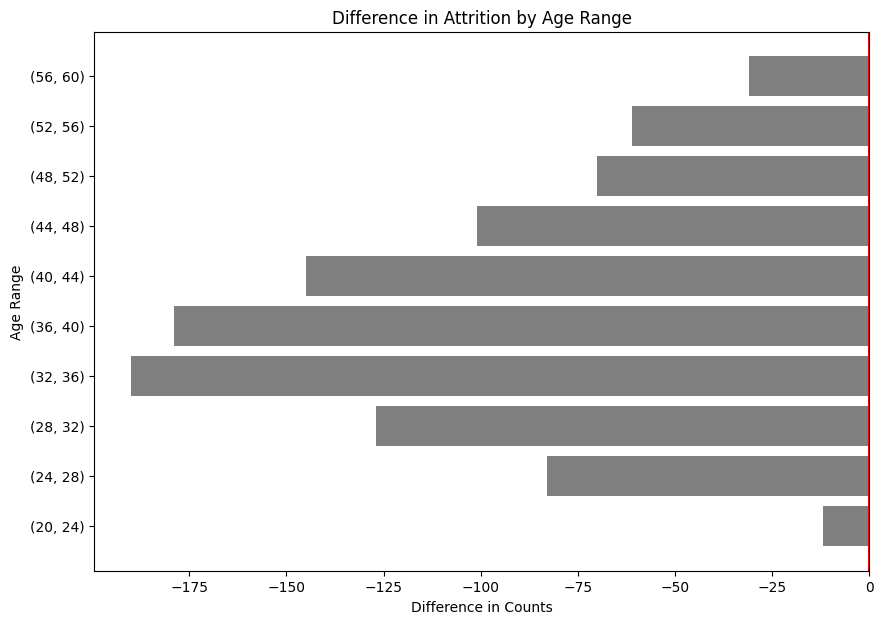

In [66]:
# Assuming df is already loaded and contains your data
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']

# Create histograms (counts for each age bin) for both groups
bins = np.linspace(20, 60, 11) # Adjust bins if needed
hist_yes, _ = np.histogram(attrition_yes, bins=bins)
hist_no, _ = np.histogram(attrition_no, bins=bins)

# Create a dataframe from the histogram data
df_hist = pd.DataFrame({
    'Age_Bin': [(int(bins[i]), int(bins[i+1])) for i in range(len(bins)-1)],
    'Attrition_Yes': hist_yes,
    'Attrition_No': hist_no
})

# Calculate difference for diverging bar chart
df_hist['Diff'] = df_hist['Attrition_Yes'] - df_hist['Attrition_No']

# Plot
plt.figure(figsize=(10, 7))
colors = ['gray' if d < 0 else 'black' for d in df_hist['Diff']]
plt.barh(df_hist['Age_Bin'].astype(str), df_hist['Diff'], color=colors, align='center')
plt.xlabel('Difference in Counts')
plt.ylabel('Age Range')
plt.title('Difference in Attrition by Age Range')
plt.axvline(x=0, color='red') # Add a vertical line at 0 for reference
plt.show()

In [65]:
# Calculate the midpoint (you can adjust this based on your needs)
df['midpoint'] = (df['2013'] + df['2014']) / 2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bars for 2013 and 2014 with midpoint as the baseline
ax.barh(df['Product'], df['2013'], color='gray', align='center')
ax.barh(df['Product'], df['2014'] - df['2013'], color='black', align='center',
        left=df['2013'])

# Set the labels, title, and display the plot
ax.set_xlabel('% of Consumers Planning to Purchase Each Product')
ax.set_title('Are Consumers Bored with Technology?')
plt.show()

KeyError: '2013'

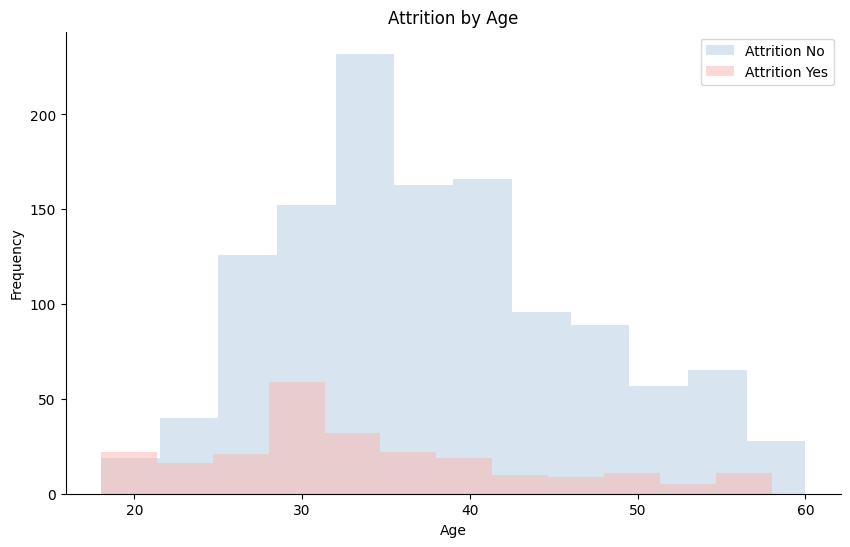

In [68]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']

# Colors from Seaborn's Pastel1 palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Set figure size
plt.figure(figsize=(10, 6))

# Create histograms for both groups using the specified colors
plt.hist(attrition_no, bins=12, alpha=0.5, label='Attrition No', color=blue_color)
plt.hist(attrition_yes, bins=12, alpha=0.5, label='Attrition Yes', color=red_color)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Attrition by Age')
plt.legend()

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

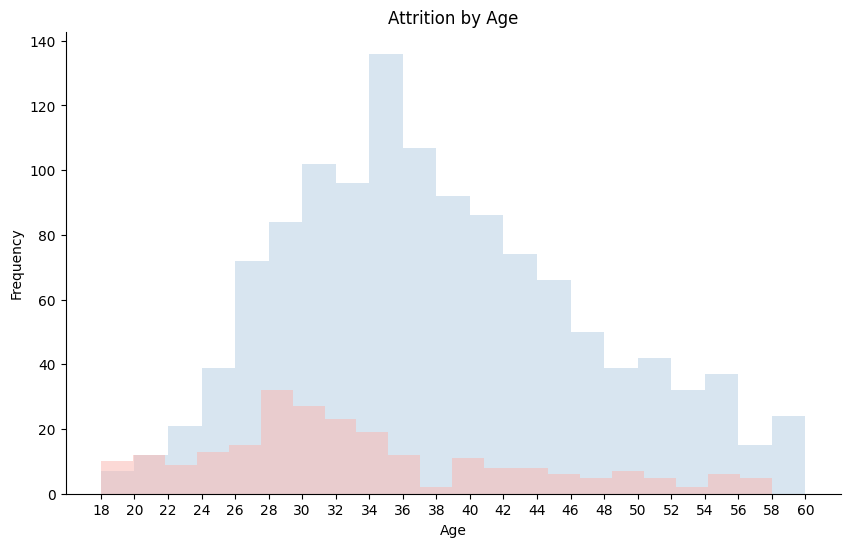

In [76]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']

# Colors from Seaborn's Pastel1 palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Set figure size
plt.figure(figsize=(10, 6))

# Create histograms for both groups using the specified colors
plt.hist(attrition_no, bins=21, alpha=0.5, label='Attrition No', color=blue_color)
plt.hist(attrition_yes, bins=21, alpha=0.5, label='Attrition Yes', color=red_color)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Attrition by Age')

# Set custom x-labels
plt.xticks([18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60])

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

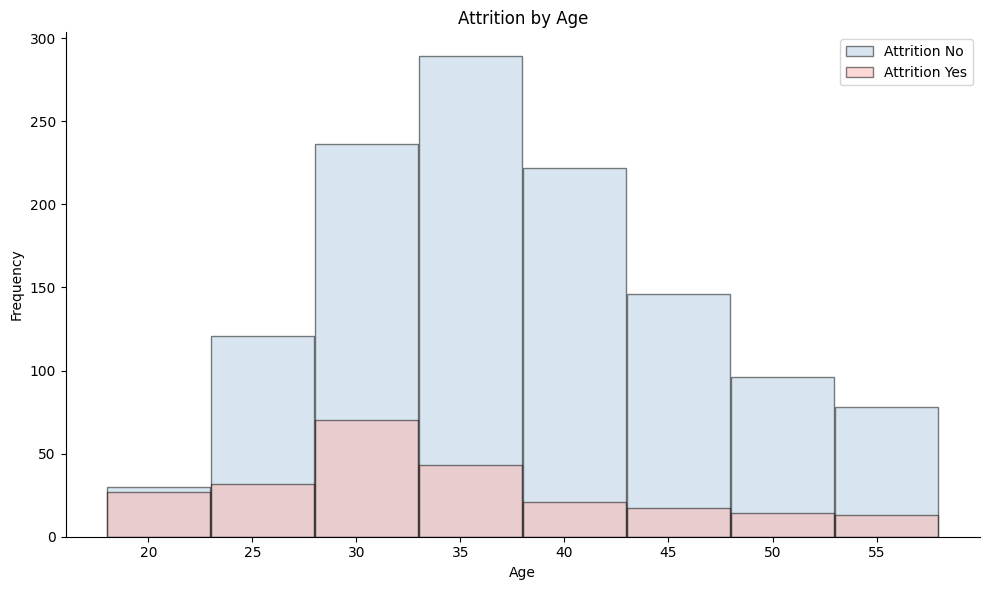

In [61]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['Age']
attrition_no = df[df['Attrition'] == 'No']['Age']

# Colors from Seaborn's Pastel1 palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Set figure size
plt.figure(figsize=(10, 6))

# Define custom bins for better clarity
bins = [i for i in range(18, 60, 5)]  # Here, I'm using bins of width 5, adjust as needed

# Create histograms for both groups using the specified colors
# Adjust bar width (rwidth) and add edgecolor for clarity
plt.hist(attrition_no, bins=bins, alpha=0.5, label='Attrition No', color=blue_color, edgecolor='black', rwidth=0.99)
plt.hist(attrition_yes, bins=bins, alpha=0.5, label='Attrition Yes', color=red_color, edgecolor='black', rwidth=0.99)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Attrition by Age')
plt.legend()

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Ensure everything fits nicely
plt.tight_layout()

# Show plot
plt.show()

In [64]:
# Convert percentages for 'No' to negative for plotting to the left
df['No'] = -df['No']

# Setting the colors
color_no = '#a6a6a6'  # Gray for 'No'
color_yes = '#000000'  # Black for 'Yes'

plt.figure(figsize=(10, 6))

# Plotting the bars
bars_no = plt.barh(df['BusinessTravel'], df['No'], color=color_no, label='No')
bars_yes = plt.barh(df['BusinessTravel'], df['Yes'], color=color_yes, label='Yes')

# Adding data labels to the bars
for bar in bars_no:
    plt.text(bar.get_x() + bar.get_width() - 1, bar.get_y() + bar.get_height()/2, 
             f'{abs(bar.get_width()):.1f}%', va='center', ha='right', color='white', fontsize=10)

for bar in bars_yes:
    plt.text(bar.get_x() + 1, bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}%', va='center', ha='left', color='white', fontsize=10)

# Customizing the plot
plt.axvline(0, color='grey')  # Center line
plt.gca().invert_yaxis()  # Invert y-axis to have the larger categories at the top
plt.xticks(np.arange(-100, 101, 20))  # Set x-axis ticks
plt.yticks(fontsize=12)  # Set y-axis tick font size
plt.xlabel('% of Consumers Planning to Purchase Each Product', fontsize=12)
plt.title('How to Create Diverging Bar Charts', fontsize=16, pad=20)

# Remove borders & ticks for a clean look
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

KeyError: 'No'

In [63]:
# Colors from sns.color_palette("Pastel1")
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Set the figure size
plt.figure(figsize=(12, 7))

# Create the diverging bar chart
bars = plt.barh(df['BusinessTravel'], -df['No'], color=blue_color, label='No')
bars2 = plt.barh(df['BusinessTravel'], df['Yes'], color=red_color, left=-df['No'], label='Yes')

# Add percentage labels
for bar in bars:
    width = bar.get_width()
    plt.text(width - 2, bar.get_y() + bar.get_height()/2, f'{abs(width):.1f}%', va='center', ha='right', color='white', fontsize=12)

for bar in bars2:
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center', ha='left', color='white', fontsize=12)

# Adjust the plot
plt.axvline(x=0, color='grey', linestyle='--')
plt.yticks(df['BusinessTravel'])
plt.xlabel('Percentage')
plt.ylabel('Business Travel Type')
plt.title('Attrition Percentage by BusinessTravel')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)
plt.gca().xaxis.tick_top()
plt.gca().invert_yaxis()

# Remove the borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

KeyError: 'No'

<Figure size 1200x700 with 0 Axes>

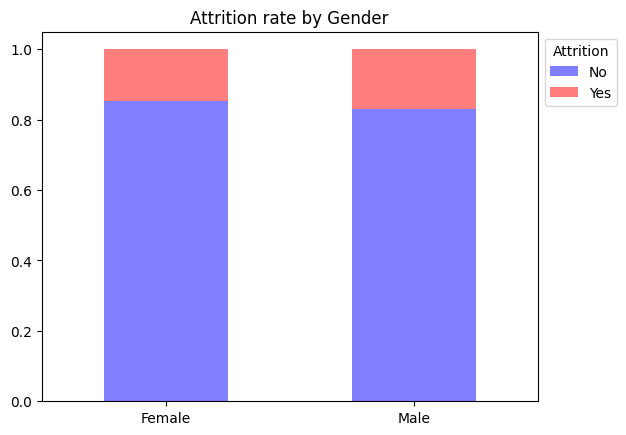

In [17]:
# Group the data by Gender and calculate attrition rates
attrition_rates = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()

# Create a bar chart
attrition_rates.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Gender')
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')

plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

#a proporção de homens e mulheres que deixam a empresa é muito semelhante 

In [18]:
# Count the number of employees by gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

# Count the number of male and female employees with "Attrition" equal to "Yes"
attrition_yes_counts = df[df['Attrition'] == 'Yes']['Gender'].value_counts()

# Count the number of male and female employees with "Attrition" equal to "No"
attrition_no_counts = df[df['Attrition'] == 'No']['Gender'].value_counts()

# Display the counts for both groups
print("Counts for Attrition 'Yes':")
print(attrition_yes_counts)
print("\nCounts for Attrition 'No':")
print(attrition_no_counts)

Gender
Male      882
Female    588
Name: count, dtype: int64
Counts for Attrition 'Yes':
Gender
Male      150
Female     87
Name: count, dtype: int64

Counts for Attrition 'No':
Gender
Male      732
Female    501
Name: count, dtype: int64


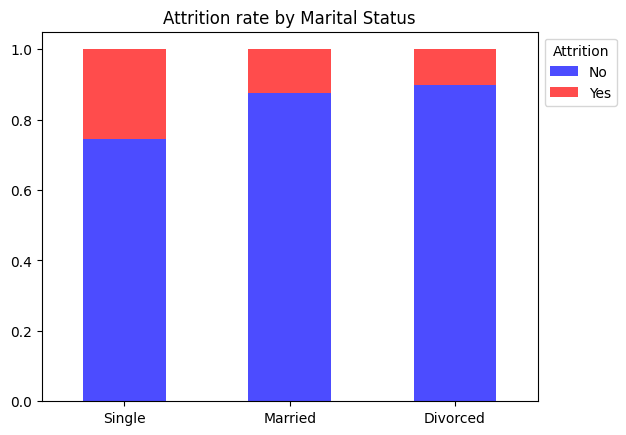

In [19]:
# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= False)

# Create a bar chart to visualize marital status by attrition, sorted by the "Attrition Yes" rate
attrition_rates.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.7)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

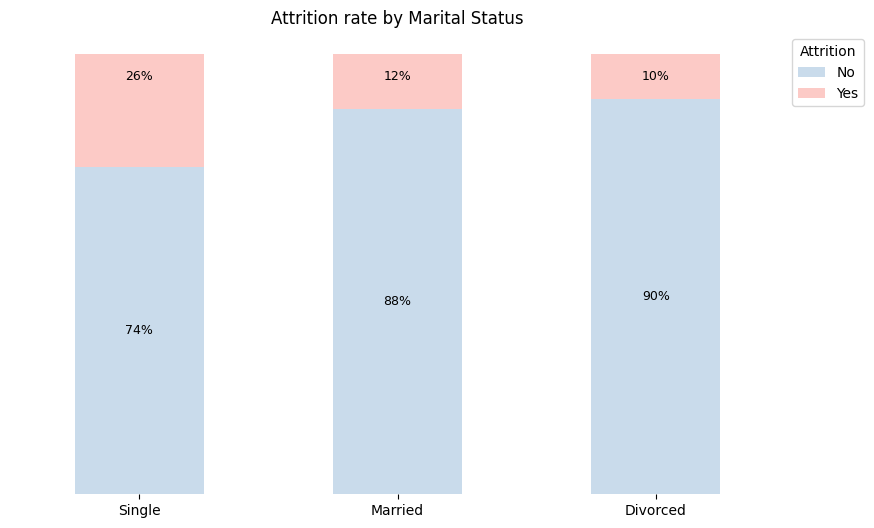

In [52]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=False)

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='bar', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Marital Status')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Hide y-axis ticks
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')


# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height() - 0.05, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [20]:
# Count the number of employees in each marital status category
marital_status_counts = df['MaritalStatus'].value_counts()
print(marital_status_counts)

# Count the number of employees who said "Yes" or "No" for attrition in each marital status category
marital_status_counts = df.groupby(['MaritalStatus', 'Attrition']).size().unstack(fill_value=0)
print(marital_status_counts)

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120


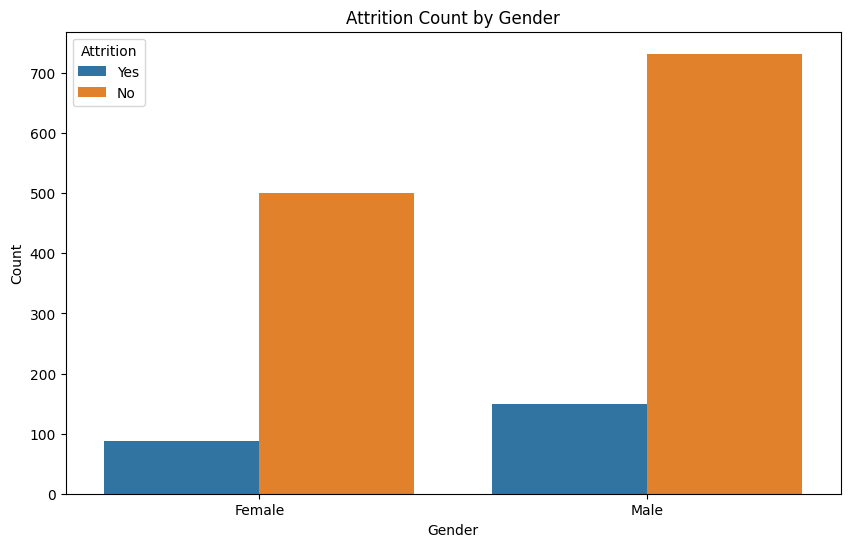

In [21]:
#acho que este gráfico visualmente é mais confuso e nao retiramos grande info
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Attrition Count by Gender')
plt.show()

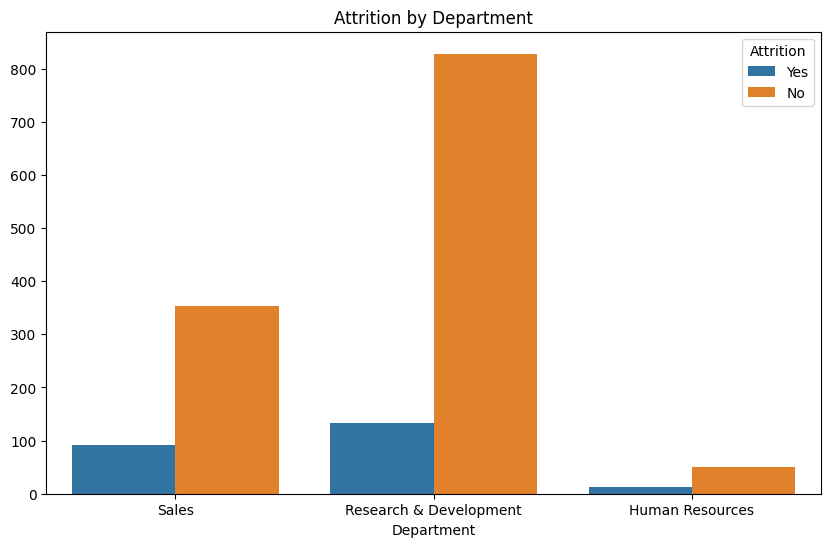

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)

plt.xlabel('Department')
plt.ylabel('')
plt.title('Attrition by Department')
plt.show()

#dos trabalhadores que querem sair, a maioria divide-se entre pessoas que trabalham no departamento de vendas e R&D. 
#em proporção, a área de sales é mais preocupante, tendo em conta que a % de trabalhadores é maior.

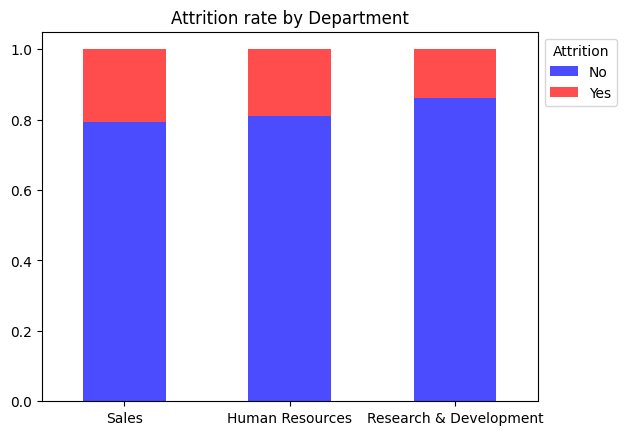

In [23]:
# Group the data by Department and calculate attrition rates
attrition_rates = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= False)

# Create a bar chart
attrition_rates.plot(kind='bar', stacked=True, color=['blue', 'red'], alpha=0.7)
plt.xlabel('')
plt.ylabel('')
plt.title('Attrition rate by Department')
plt.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal
plt.show()

In [24]:
# Count the number of employees who said "Yes" or "No" for attrition in each Department category
department_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
print(department_counts)

Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


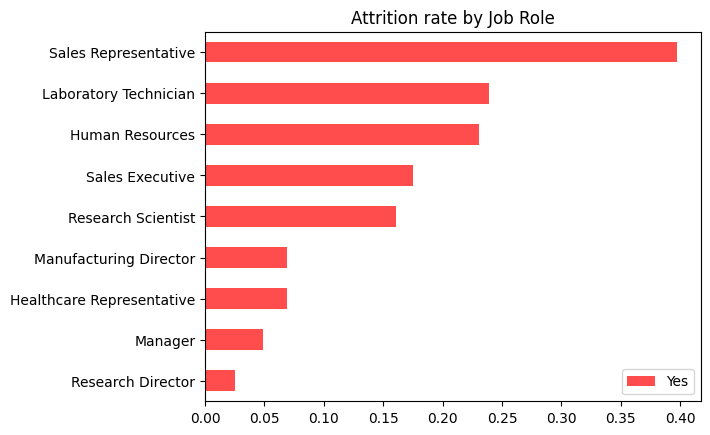

In [25]:
# Group the data by JobRole and calculate attrition rates
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending= True)

# Create a bar chart with sorted 'Yes' attrition rates, "Job Role" on the y-axis
attrition_rates.plot(kind='barh', y='Yes', color='red', alpha=0.7)
plt.ylabel('')
plt.xlabel('')
plt.title('Attrition rate by Job Role')
plt.show()

In [26]:
# Count the number of employees who said "Yes" or "No" for attrition in each Job role category
jobrole_counts = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
print(jobrole_counts)

# Calculate the percentage of "Yes" attrition for each job role
jobrole_counts['Percentage_Yes'] = (jobrole_counts['Yes'] / (jobrole_counts['Yes'] + jobrole_counts['No'])) * 100

# Display the counts and percentages
print(jobrole_counts)

Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
Attrition                   No  Yes  Percentage_Yes
JobRole                                            
Healthcare Representative  122    9        6.870229
Human Resources             40   12       23.076923
Laboratory Technician      197   62       23.938224
Manager                     97    5        4.901961
Manufacturing Director     135   10        6.896552
Research Director           78    2        2.500000
Research Scientist         245   47       16.095890
Sales Executive            269   57       17.484663
Sales Representative        50   33       39.759036


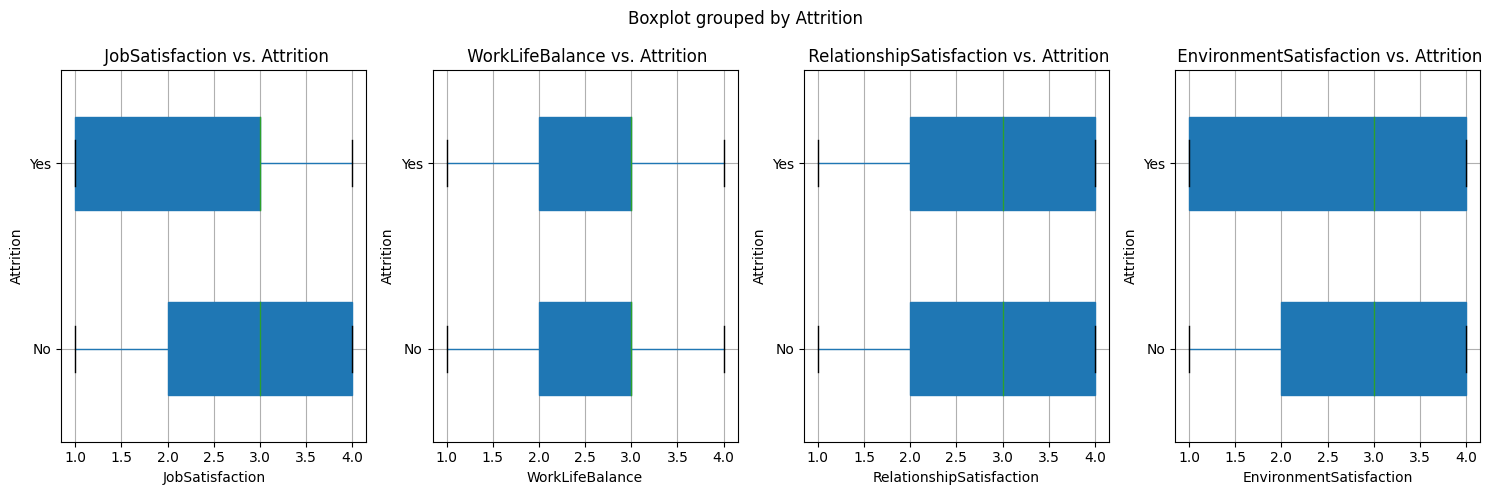

In [27]:
# Create box plots to visualize the distribution of numerical variables by attrition
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, feature in enumerate(['JobSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'EnvironmentSatisfaction']):
    ax = axes[i]
    df.boxplot(column=feature, by='Attrition', vert=False, widths=0.5, patch_artist=True, sym='.', ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Attrition')
    ax.set_title(f' {feature} vs. Attrition')

plt.tight_layout()
plt.show()

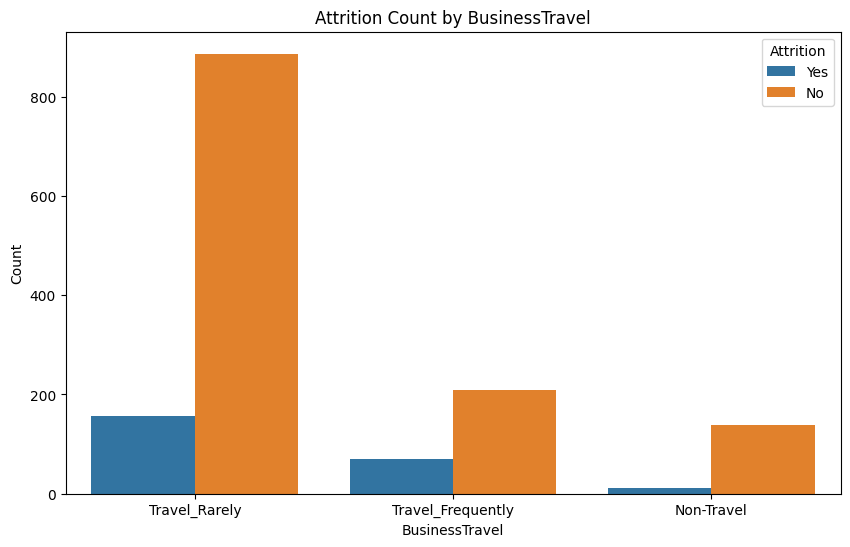

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.xlabel('BusinessTravel')
plt.ylabel('Count')
plt.title('Attrition Count by BusinessTravel')
plt.show()

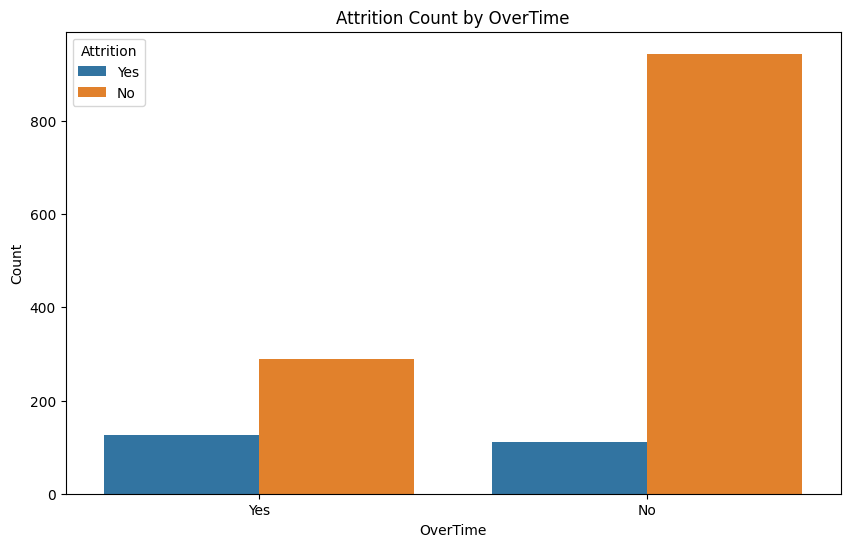

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Count by OverTime')
plt.show()

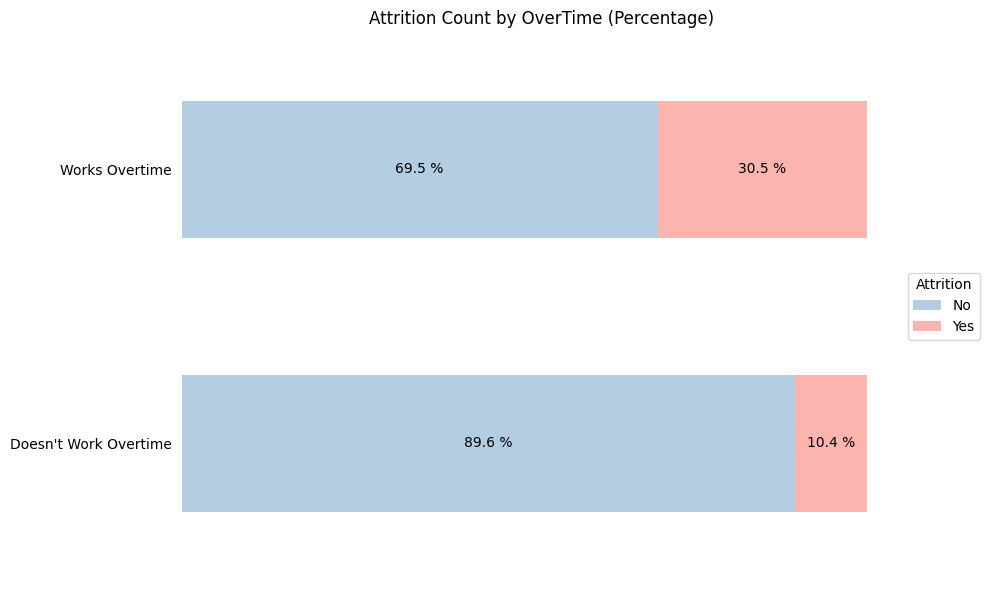

In [91]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color, red_color]

# Create a pivot table of counts
pivot_counts = df.pivot_table(index='OverTime', columns='Attrition', values='Age', aggfunc='count').fillna(0)

# Convert counts to percentages
pivot_percentages = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart
ax = pivot_percentages.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

# Remove border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add percentage annotations inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2, 
            '{:.1f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black')

plt.title('Attrition Count by OverTime (Percentage)')
plt.legend(title='Attrition', loc='center left', bbox_to_anchor=(1, 0.5))

# Change the y labels
ax.set_yticklabels(['Doesn\'t Work Overtime', 'Works Overtime'])

# Remove x axis ticks, labels and y label
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticks([])
ax.set_ylabel('')

plt.tight_layout()
plt.show()

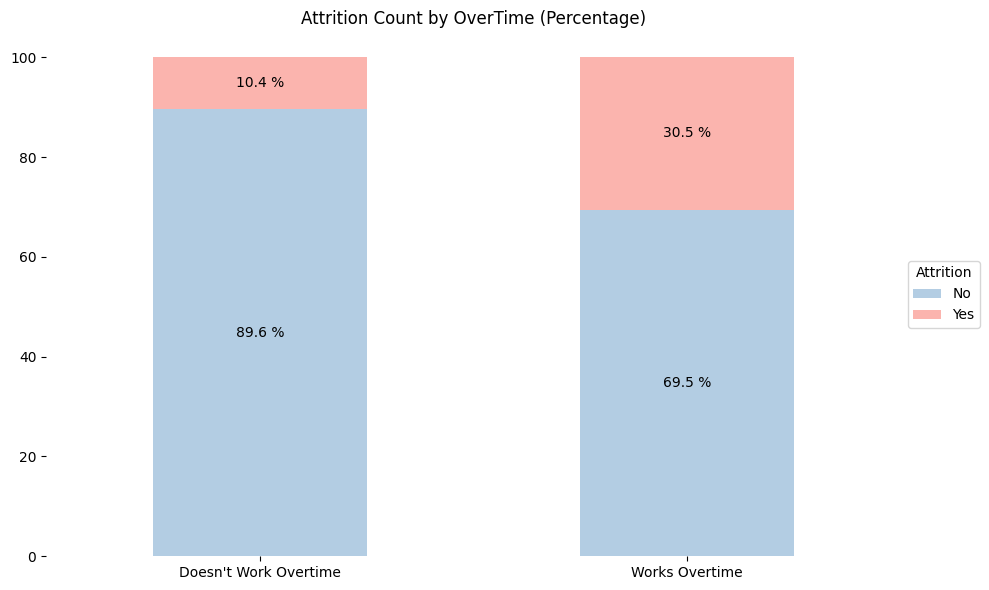

In [93]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color, red_color]

# Create a pivot table of counts
pivot_counts = df.pivot_table(index='OverTime', columns='Attrition', values='Age', aggfunc='count').fillna(0)

# Convert counts to percentages
pivot_percentages = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Plot 100% stacked bar chart in vertical orientation
ax = pivot_percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Remove border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add percentage annotations inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2,  # Centering vertically
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black')

plt.title('Attrition Count by OverTime (Percentage)')
plt.legend(title='Attrition', loc='center left', bbox_to_anchor=(1, 0.5))

# Change the x labels and adjust them to be horizontal
ax.set_xticklabels(['Doesn\'t Work Overtime', 'Works Overtime'], rotation=0)  # Set rotation to 0 for horizontal labels
ax.set_xlabel('')

plt.tight_layout()
plt.show()


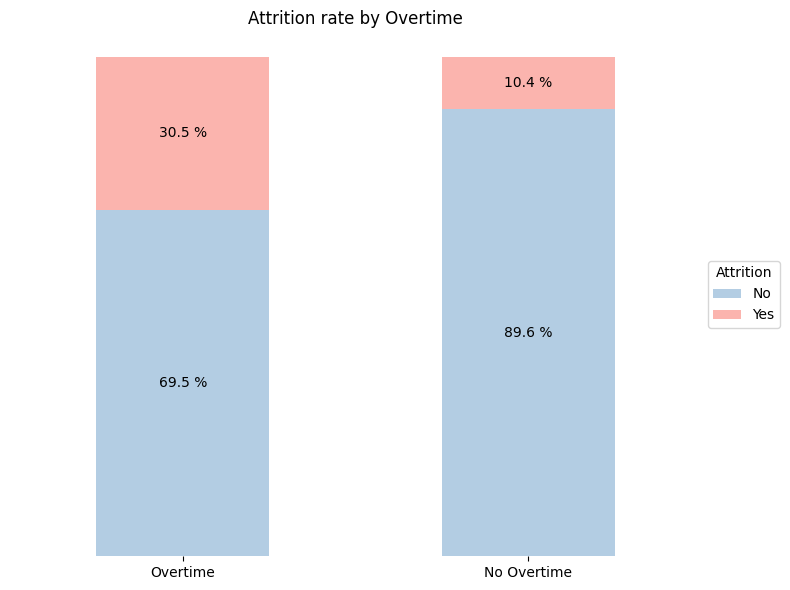

In [166]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [blue_color, red_color]

# Create a pivot table of counts
pivot_counts = df.pivot_table(index='OverTime', columns='Attrition', values='Age', aggfunc='count').fillna(0)

# Convert counts to percentages
pivot_percentages = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100

# Reverse the order of the rows for plotting
pivot_percentages = pivot_percentages.iloc[::-1]

# Plot 100% stacked bar chart in vertical orientation
ax = pivot_percentages.plot(kind='bar', stacked=True, figsize=(8, 6), color=colors, )

# Remove border lines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add percentage annotations inside bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, 
            y + height/2,  # Centering vertically
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black')

plt.title('Attrition rate by Overtime')
plt.legend(title='Attrition', loc='center left', bbox_to_anchor=(1, 0.5))

# Change the x labels and adjust them to be horizontal
ax.set_xticklabels(['Overtime', 'No Overtime'], rotation=0)  # Set rotation to 0 for horizontal labels
ax.set_xlabel('')

# Remove y-ticks
ax.set_yticks([])

plt.tight_layout()
plt.show()

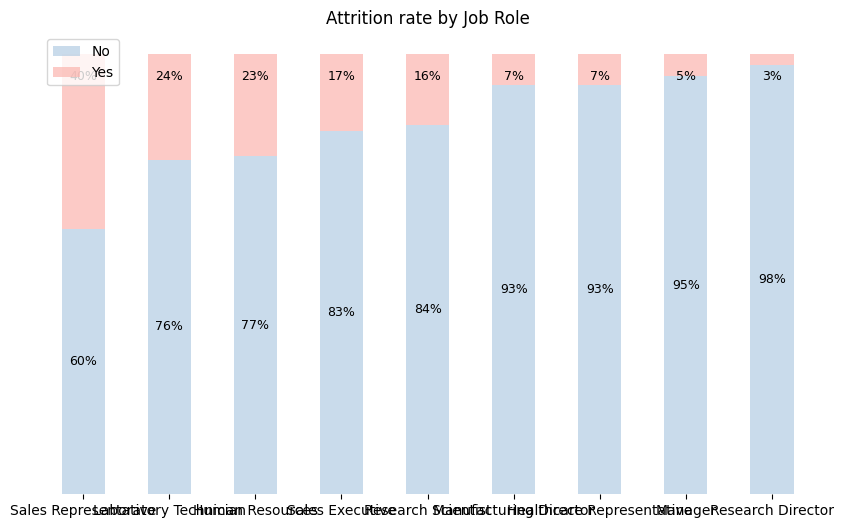

In [128]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=False)

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='bar', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Job Role')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Hide y-axis ticks
plt.legend()


# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height() - 0.05, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

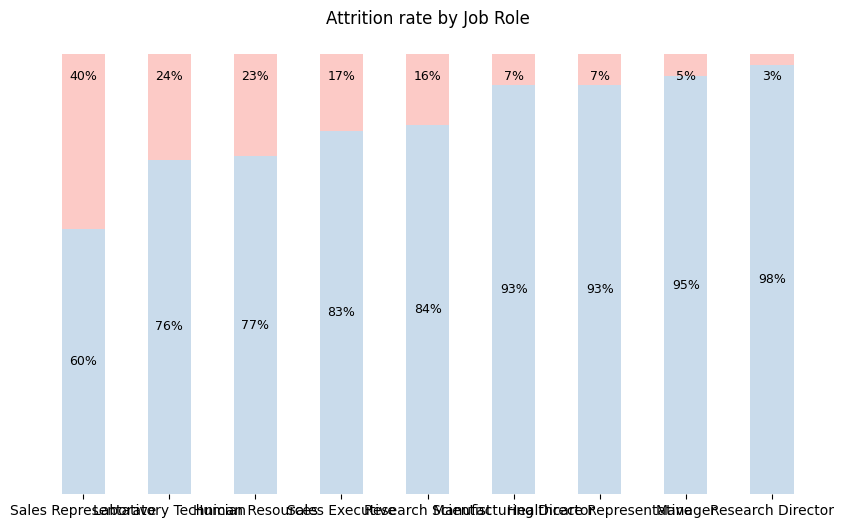

In [129]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=False)

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='bar', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Job Role')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Hide y-axis ticks
plt.legend().set_visible(False)  # Hide the legend

# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height() - 0.05, 
                       '{:.0%}'.format(patch.get_height()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

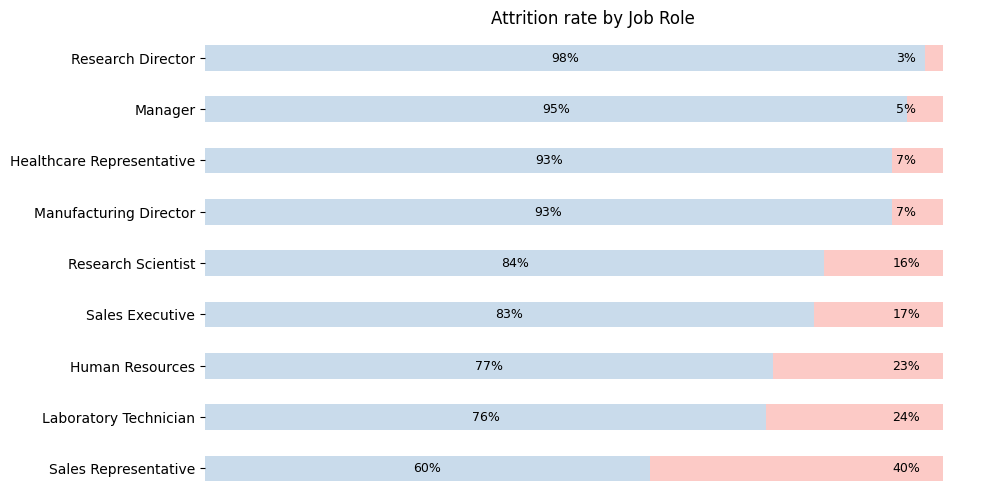

In [130]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=False)

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='barh', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Job Role')
plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.xticks([])  # Hide x-axis ticks
plt.legend().set_visible(False)  # Hide the legend

# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width() - 0.05, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

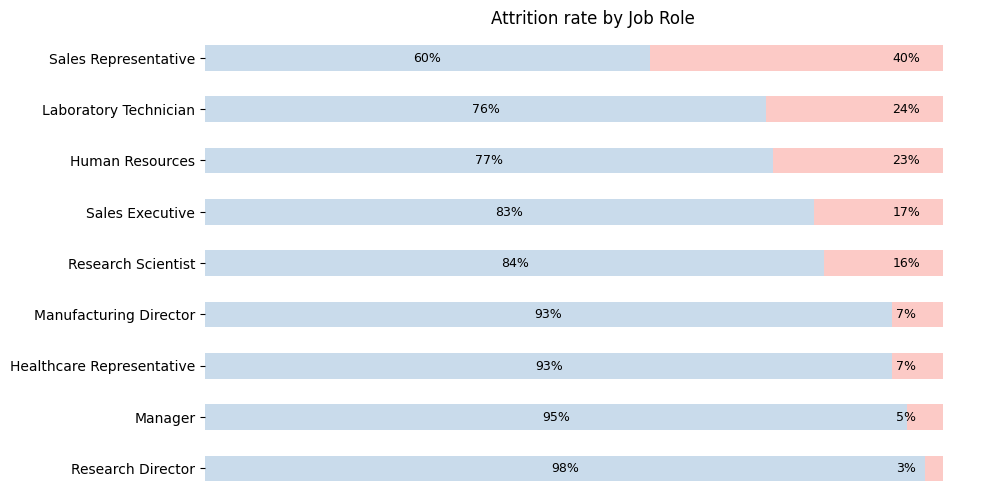

In [131]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=True)  # Reverse the order

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='barh', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Job Role')
plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.xticks([])  # Hide x-axis ticks
plt.legend().set_visible(False)  # Hide the legend

# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        plt.gca().text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width() - 0.05, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

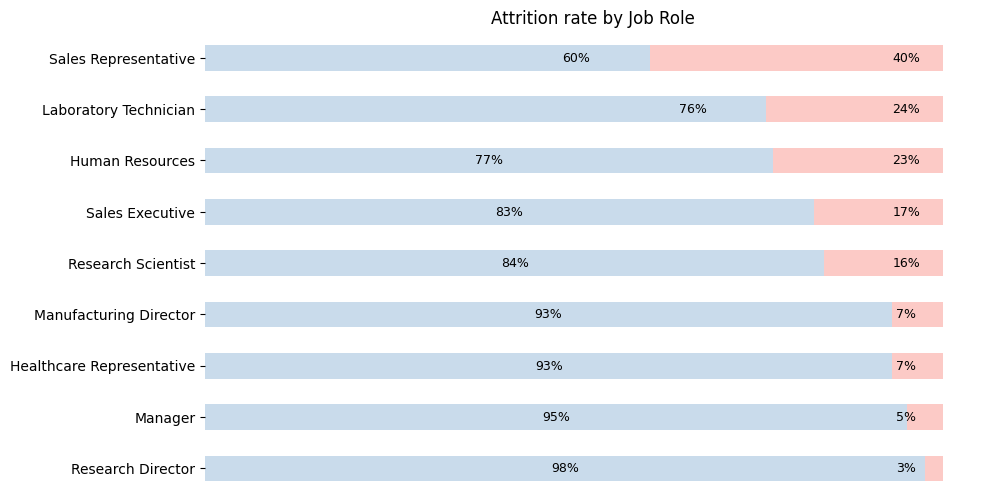

In [132]:
# Colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Calculate attrition rates for each marital status category
attrition_rates = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rates = attrition_rates.sort_values(by='Yes', ascending=True)  # Reverse the order

# Create a bar chart to visualize marital status by attrition
plt.figure(figsize=(10, 6))
attrition_rates.plot(kind='barh', stacked=True, color=[blue_color, red_color], alpha=0.7, ax=plt.gca())
plt.title('Attrition rate by Job Role')
plt.ylabel('')
plt.xlabel('')
plt.yticks(rotation=0)
plt.xticks([])  # Hide x-axis ticks
plt.legend().set_visible(False)  # Hide the legend

# Annotate the bars with the percentage values
for idx, patch in enumerate(plt.gca().patches):
    if idx < len(attrition_rates):  # For the 'Yes' values
        x_pos = patch.get_x() + patch.get_width()/2
        # Adjust the x-position for 'Manager' and 'Research Director'
        if idx in [len(attrition_rates) - 2, len(attrition_rates) - 1]:  # Assuming 'Manager' and 'Research Director' are the last two bars
            x_pos = patch.get_x() + patch.get_width() - 0.1
        plt.gca().text(x_pos, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)
    else:  # For the 'No' values
        plt.gca().text(patch.get_x() + patch.get_width() - 0.05, patch.get_y() + patch.get_height()/2, 
                       '{:.0%}'.format(patch.get_width()), 
                       ha='center', va='center', color='black', fontsize=9)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

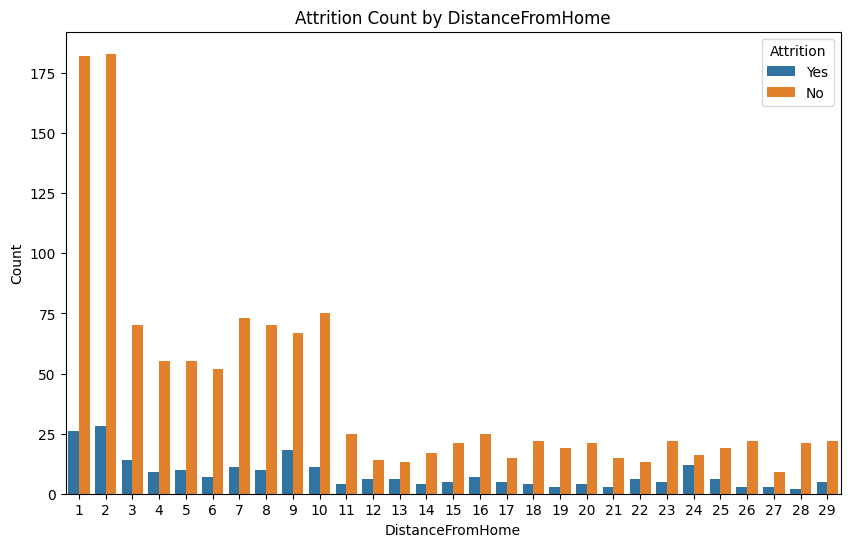

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df)
plt.xlabel('DistanceFromHome')
plt.ylabel('Count')
plt.title('Attrition Count by DistanceFromHome')
plt.show()

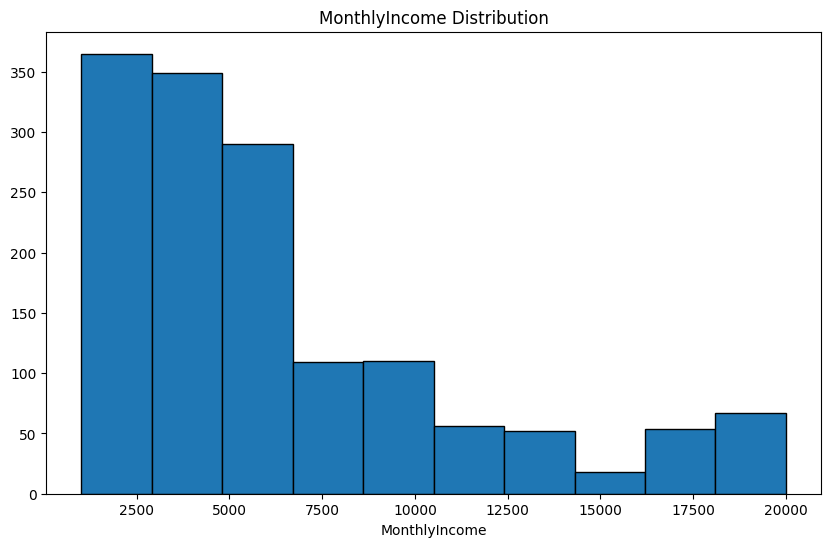

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=10, edgecolor='black')
plt.xlabel('MonthlyIncome')
plt.ylabel('')
plt.title('MonthlyIncome Distribution')
plt.show()

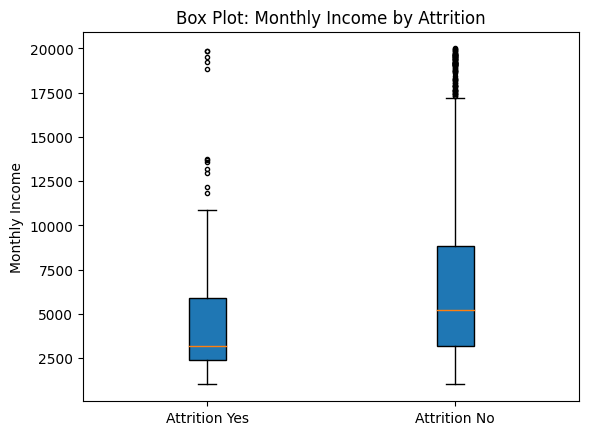

In [32]:
# Create a box plot to visualize MonthlyIncome by attrition
plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
            labels=['Attrition Yes', 'Attrition No'], patch_artist=True, sym='.')
plt.ylabel('Monthly Income')
plt.title('Box Plot: Monthly Income by Attrition')
plt.show()

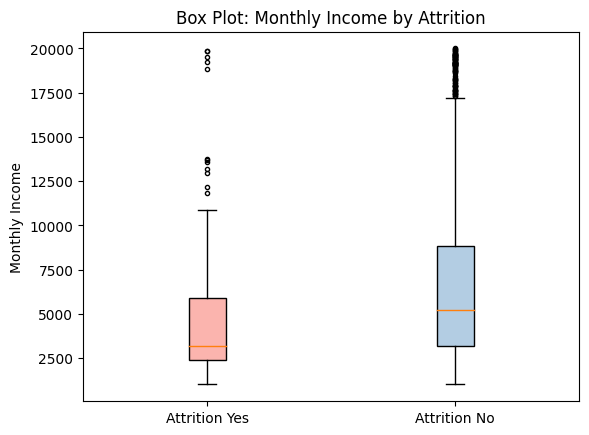

In [103]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [red_color, blue_color]  # Order of colors should match the order of data

# Create a box plot to visualize MonthlyIncome by attrition
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
                 labels=['Attrition Yes', 'Attrition No'], patch_artist=True, sym='.')

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Monthly Income')
plt.title('Box Plot: Monthly Income by Attrition')
plt.show()

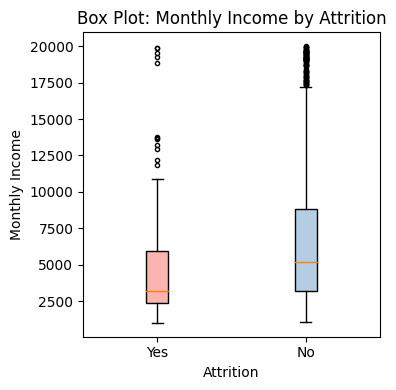

In [108]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [red_color, blue_color]  # Order of colors should match the order of data

# Set the plot size
plt.figure(figsize=(4, 4))

# Create a box plot to visualize MonthlyIncome by attrition
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
                 labels=['Yes', 'No'], patch_artist=True, sym='.')

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.title('Box Plot: Monthly Income by Attrition')
plt.tight_layout()
plt.show()

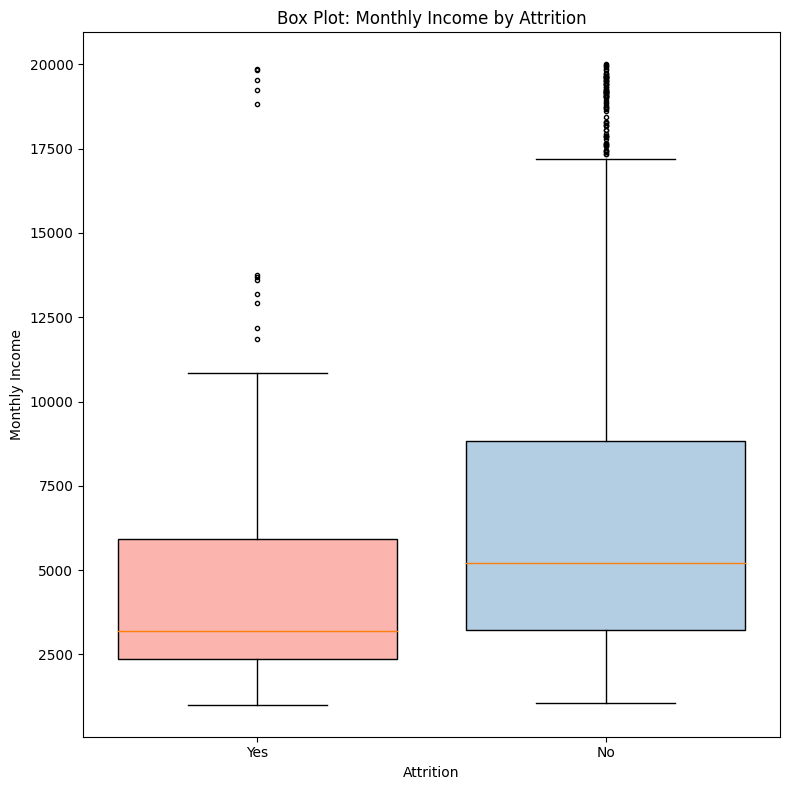

In [114]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [red_color, blue_color]

# Set the plot size
plt.figure(figsize=(8, 8))

# Create a box plot to visualize MonthlyIncome by attrition
# Adjusting the widths parameter to make boxes wider
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
                 labels=['Yes', 'No'], patch_artist=True, sym='.', widths=0.8)

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.title('Box Plot: Monthly Income by Attrition')
plt.tight_layout()
plt.show()

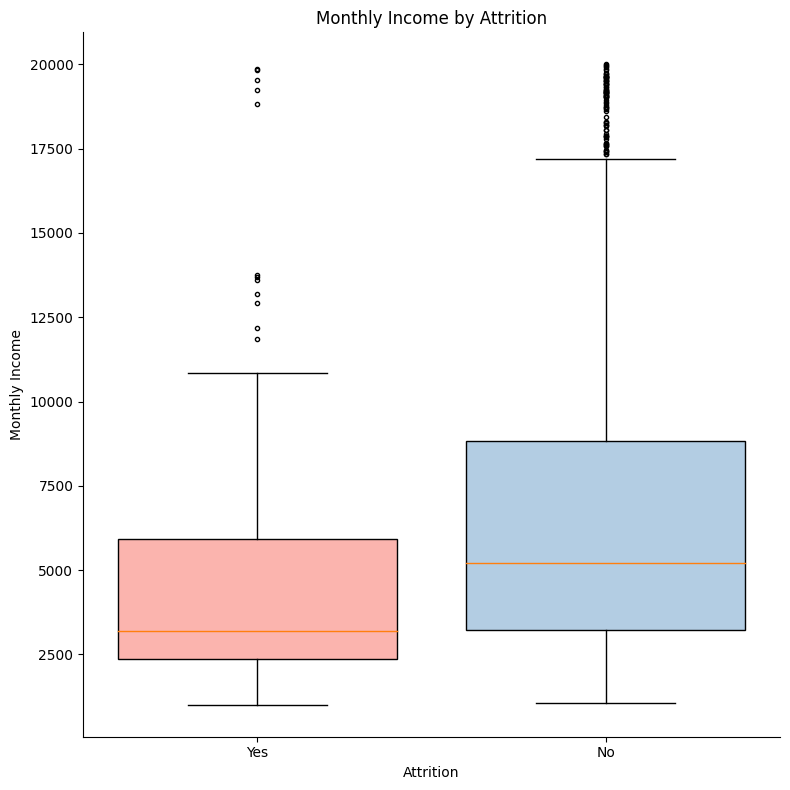

In [122]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [red_color, blue_color]

# Set the plot size
plt.figure(figsize=(8, 8))

# Create a box plot to visualize MonthlyIncome by attrition
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['MonthlyIncome'], df[df['Attrition'] == 'No']['MonthlyIncome']],
                 labels=['Yes', 'No'], patch_artist=True, sym='.', widths=0.8)

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.title('Monthly Income by Attrition')

# Removing the top and right spines
ax = plt.gca()  # Get the current axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

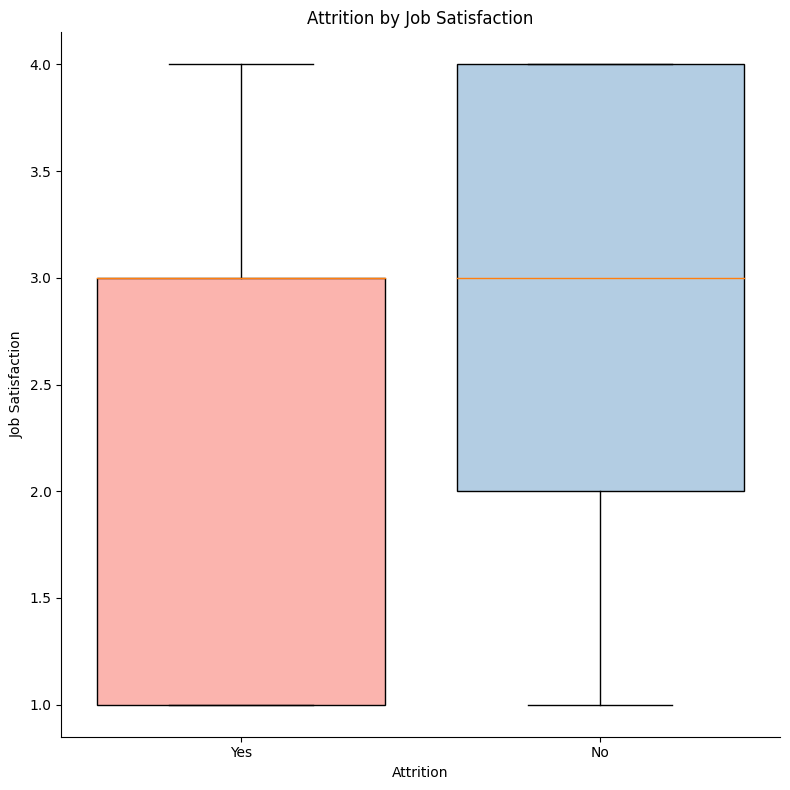

In [121]:
# Define the colors from the provided palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]
colors = [red_color, blue_color]

# Set the plot size
plt.figure(figsize=(8, 8))

# Create a box plot to visualize MonthlyIncome by attrition
bp = plt.boxplot([df[df['Attrition'] == 'Yes']['JobSatisfaction'], df[df['Attrition'] == 'No']['JobSatisfaction']],
                 labels=['Yes', 'No'], patch_artist=True, sym='.', widths=0.8)

# Applying the colors to the boxplots
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('Job Satisfaction')
plt.xlabel('Attrition')
plt.title('Attrition by Job Satisfaction')

# Removing the top and right spines
ax = plt.gca()  # Get the current axis
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

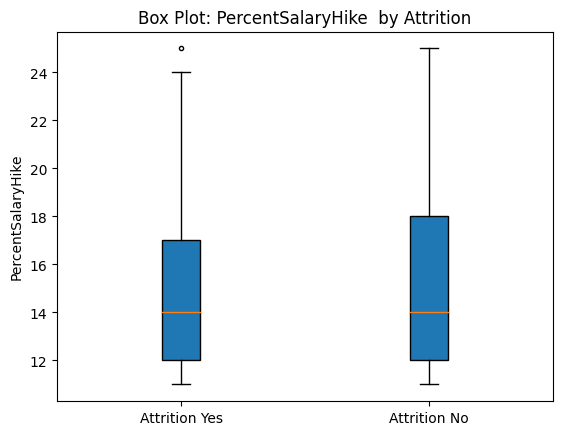

In [33]:
# Create a box plot to visualize MonthlyIncome by attrition
plt.boxplot([df[df['Attrition'] == 'Yes']['PercentSalaryHike'], df[df['Attrition'] == 'No']['PercentSalaryHike']],
            labels=['Attrition Yes', 'Attrition No'], patch_artist=True, sym='.')
plt.ylabel('PercentSalaryHike')
plt.title('Box Plot: PercentSalaryHike  by Attrition')
plt.show()

In [118]:
df_yes = df[df['Attrition'] == 'Yes']

In [119]:
df_yes['JobSatisfaction'].value_counts()

JobSatisfaction
3    73
1    66
4    52
2    46
Name: count, dtype: int64

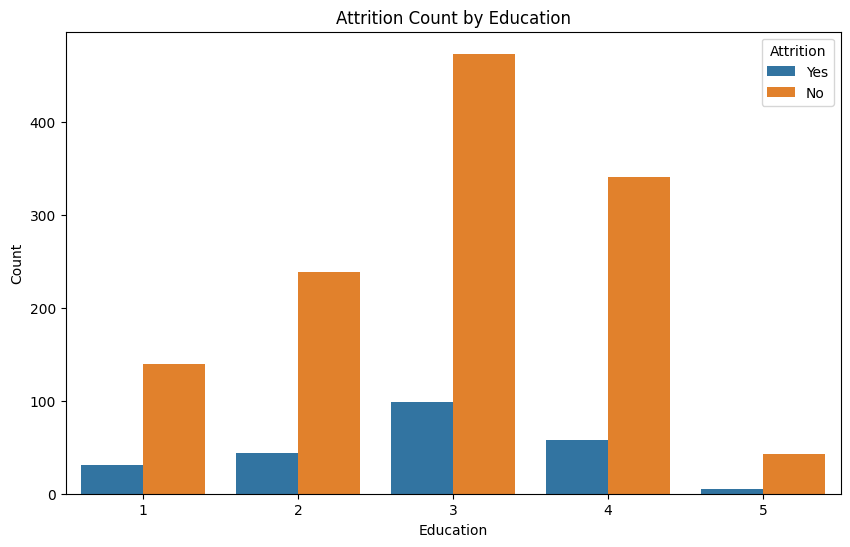

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Attrition', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Attrition Count by Education')
plt.show()

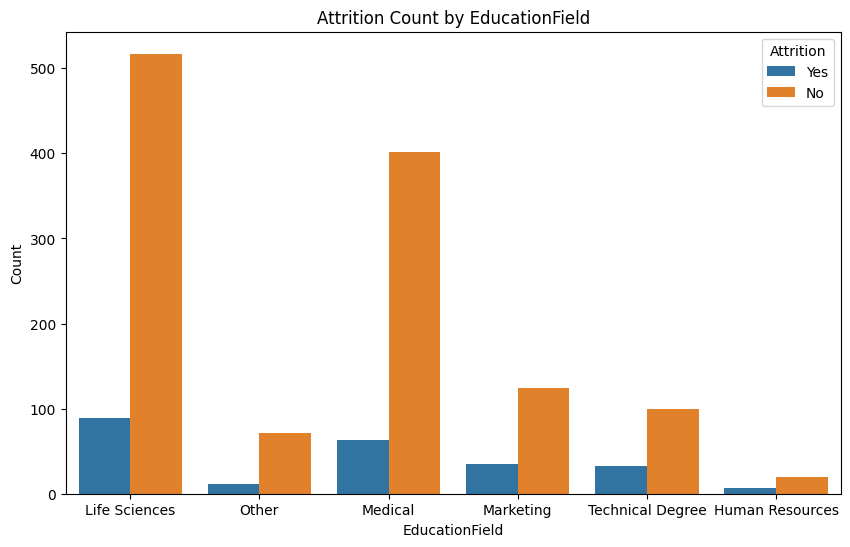

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.xlabel('EducationField')
plt.ylabel('Count')
plt.title('Attrition Count by EducationField')
plt.show()

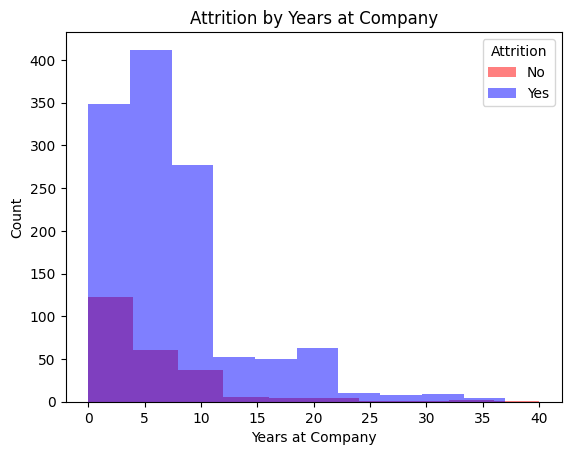

In [36]:
# Create a histogram to visualize attrition by years at the company
plt.hist(df[df['Attrition'] == 'Yes']['YearsAtCompany'], bins=10, alpha=0.5, label='Attrition Yes', color='red')
plt.hist(df[df['Attrition'] == 'No']['YearsAtCompany'], bins=10, alpha=0.5, label='Attrition No', color='blue')

plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.title('Attrition by Years at Company')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.show()

#quanto menos anos uma pessoa está numa empresa, maior tendência terá para sair se houverem factores que contribuam para isso
# que factores serão esses?

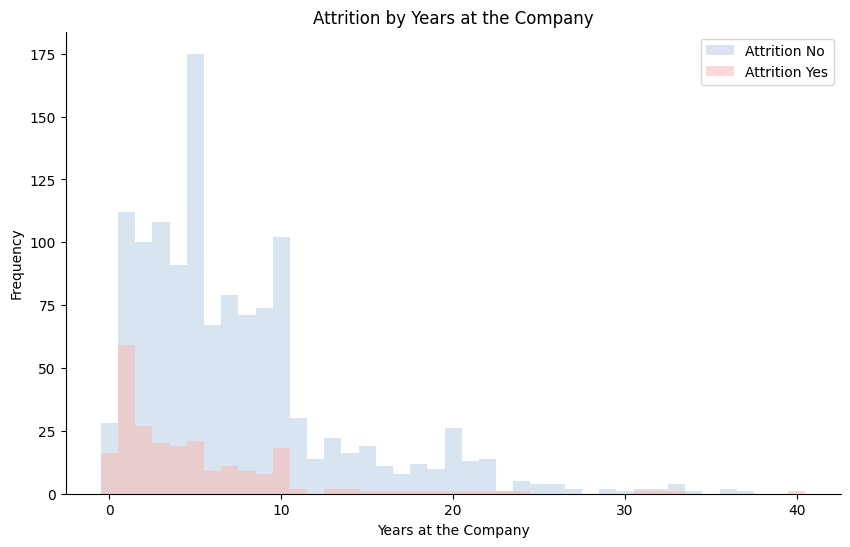

In [139]:
# Separate data into two groups: Attrition 'Yes' and 'No'
attrition_yes = df[df['Attrition'] == 'Yes']['YearsAtCompany']
attrition_no = df[df['Attrition'] == 'No']['YearsAtCompany']

# Colors from Seaborn's Pastel1 palette
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Set figure size
plt.figure(figsize=(10, 6))

# Define the bins to be by year based on the maximum years in the dataset
bins = range(0, int(df['YearsAtCompany'].max()) + 2)  # Add 2 to ensure the last year is included

# Create histograms for both groups using the specified colors and bins
plt.hist(attrition_no, bins=bins, alpha=0.5, label='Attrition No', color=blue_color, align='left')
plt.hist(attrition_yes, bins=bins, alpha=0.5, label='Attrition Yes', color=red_color, align='left')

plt.xlabel('Years at the Company')
plt.ylabel('Frequency')
plt.title('Attrition by Years at the Company')
plt.legend(loc='upper right')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.show()

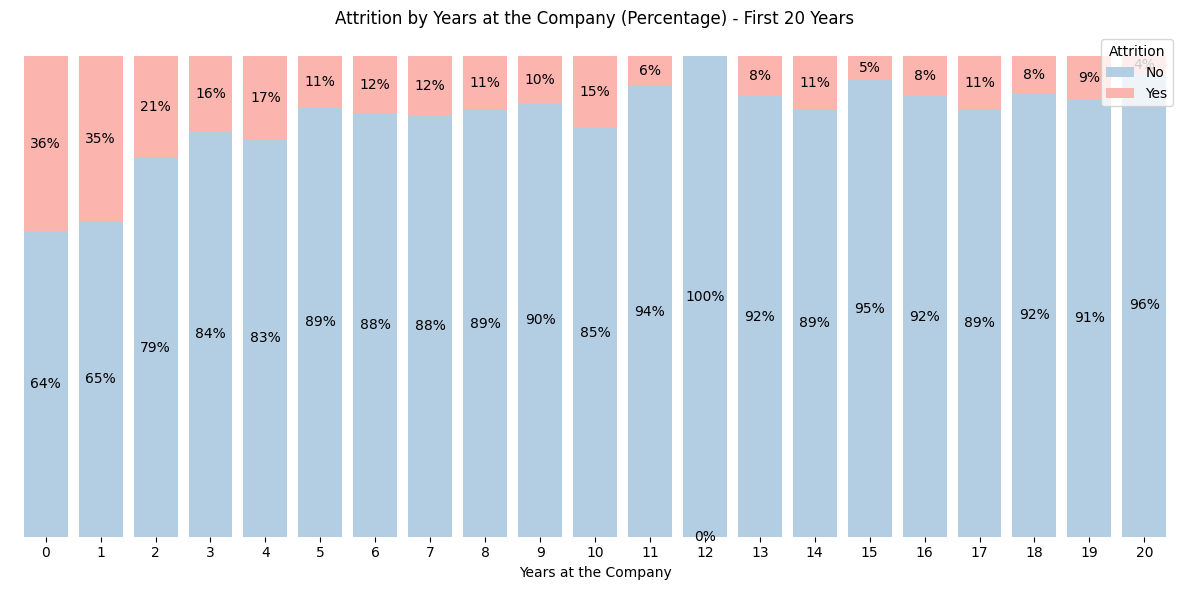

In [153]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100

# Define colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=[blue_color, red_color], width=0.8)

# Place the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate bars with percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if not (int(round(height)) == 0 and x == 12):  # Skip 0% at year 12
        ax.text(x + width / 2, y + height / 2, f'{int(round(height))}%', horizontalalignment='center', verticalalignment='center', color='black')

# Adjust the plot layout to accommodate the legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.title('Attrition by Years at the Company (Percentage) - First 20 Years')
plt.xlabel('Years at the Company')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

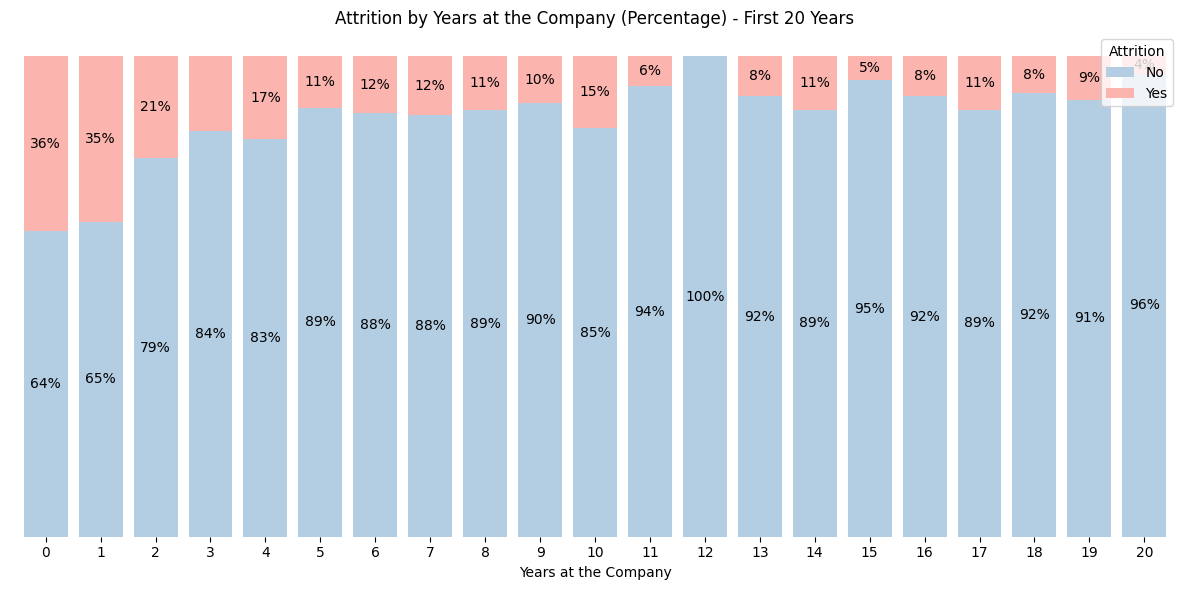

In [150]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100

# Define colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=[blue_color, red_color], width=0.8)

# Place the legend outside the plot on the right side
ax.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1.15, 1), loc='upper right')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    
    # Check if height is not zero and if it's not the 'Yes' bar for year 12
    if height > 0 and not (i == 24):  # 24 is the index for 'Yes' bar at year 12
        ax.text(x + width / 2, y + height / 2, f'{int(round(height))}%', horizontalalignment='center', verticalalignment='center', color='black')



# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.title('Attrition by Years at the Company (Percentage) - First 20 Years')
plt.xlabel('Years at the Company')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

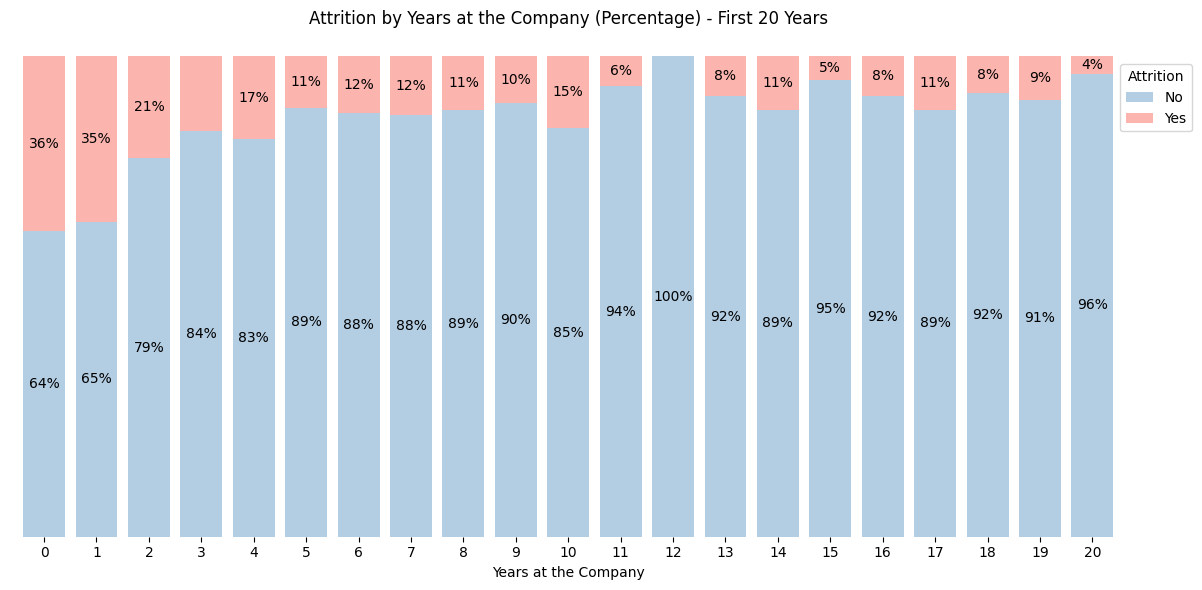

In [170]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100

# Define colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=[blue_color, red_color], width=0.8)

# Place the legend further outside the plot on the right side
ax.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1.065, 0.95), loc='upper right')


# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Check if height is not zero and if it's not the 'Yes' bar for year 12
    if height > 0 and not (i == 24):  # 24 is the index for 'Yes' bar at year 12
        ax.text(x + width / 2, y + height / 2, f'{int(round(height))}%', horizontalalignment='center', verticalalignment='center', color='black')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.title('Attrition by Years at the Company (Percentage) - First 20 Years')
plt.xlabel('Years at the Company')
plt.tight_layout()

# Show plot
plt.show()

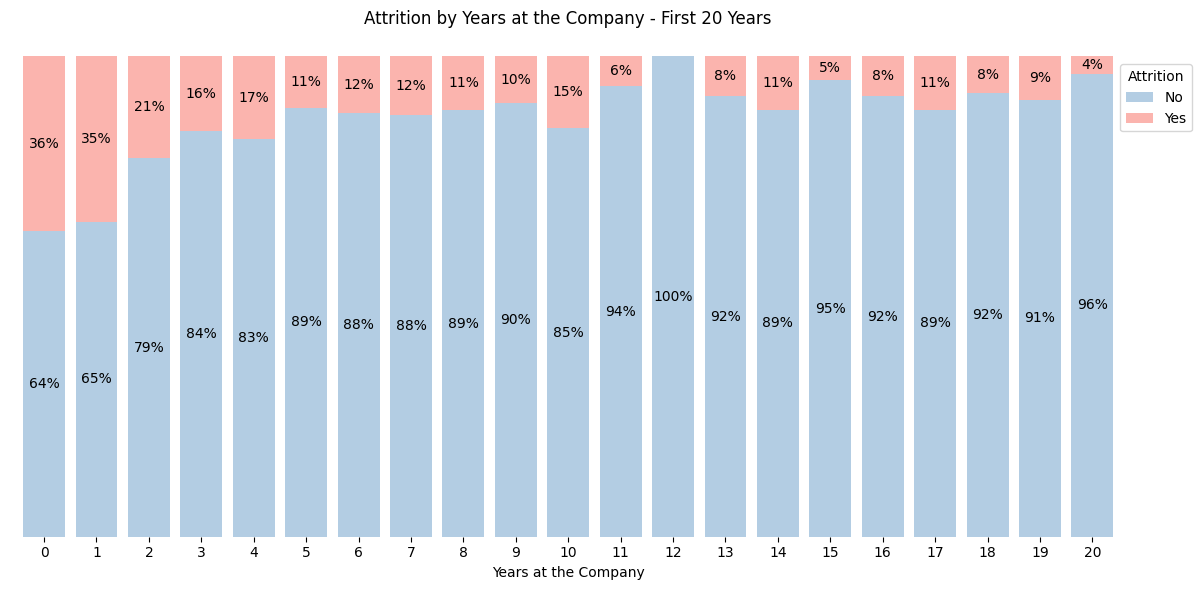

In [172]:
# Filter data for only the first 20 years
df_filtered = df[df['YearsAtCompany'] <= 20]

# Group by YearsAtCompany and Attrition, then unstack to get count of Yes and No attrition for each year
grouped = df_filtered.groupby(['YearsAtCompany', 'Attrition']).size().unstack(fill_value=0)

# Calculate percentages for each attrition category (Yes and No)
grouped['Total'] = grouped['Yes'] + grouped['No']
grouped['Yes (%)'] = grouped['Yes'] / grouped['Total'] * 100
grouped['No (%)'] = grouped['No'] / grouped['Total'] * 100

# Define colors
palette_colors = sns.color_palette("Pastel1")
blue_color = palette_colors[1]
red_color = palette_colors[0]

# Plot 100% stacked bar chart
ax = grouped[['No (%)', 'Yes (%)']].plot(kind='bar', stacked=True, figsize=(12, 6), color=[blue_color, red_color], width=0.8)

# Place the legend further outside the plot on the right side
ax.legend(title='Attrition', labels=['No', 'Yes'], bbox_to_anchor=(1.065, 0.95), loc='upper right')

# Annotate bars with percentages
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    
    # Check if height is not zero
    if height > 0:  
        ax.text(x + width / 2, y + height / 2, f'{int(round(height))}%', horizontalalignment='center', verticalalignment='center', color='black')

# Remove borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove Y-label and Y-ticks
ax.set_ylabel('')
ax.set_yticks([])

# Horizontal x-ticks
ax.tick_params(axis='x', rotation=0)

plt.title('Attrition by Years at the Company - First 20 Years')
plt.xlabel('Years at the Company')
plt.tight_layout()

# Show plot
plt.show()

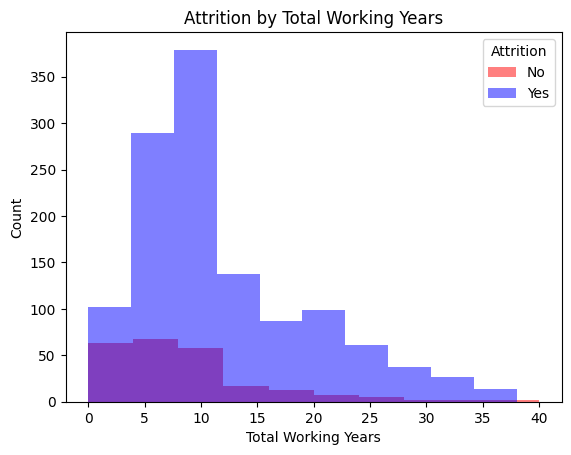

In [37]:
# Create a histogram to visualize attrition by years at the company
plt.hist(df[df['Attrition'] == 'Yes']['TotalWorkingYears'], bins=10, alpha=0.5, label='Attrition Yes', color='red')
plt.hist(df[df['Attrition'] == 'No']['TotalWorkingYears'], bins=10, alpha=0.5, label='Attrition No', color='blue')

plt.xlabel('Total Working Years')
plt.ylabel('Count')
plt.title('Attrition by Total Working Years')
plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper right')
plt.show()


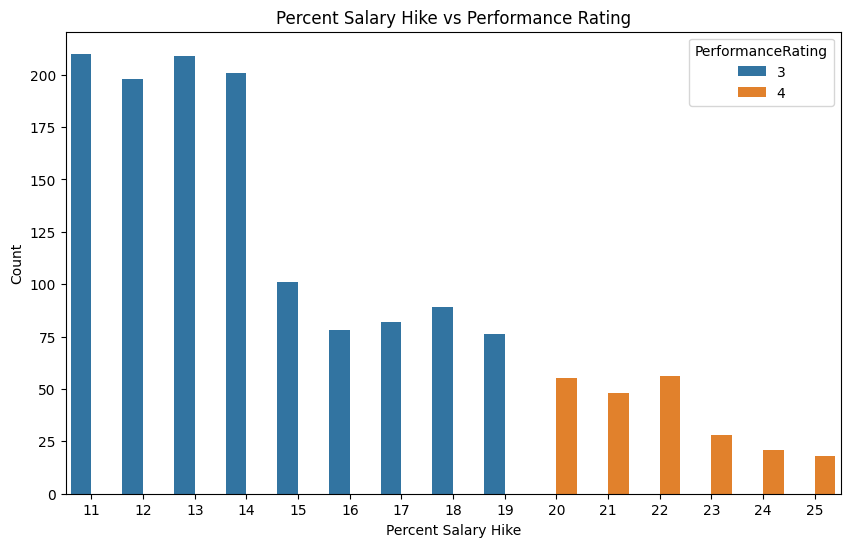

In [38]:
#de acordo com o HEAT MAP tentei ver se existe relacao entre Percent Salary Hike vs. Performance Rating

plt.figure(figsize=(10, 6))
sns.countplot(x='PercentSalaryHike', hue='PerformanceRating', data=df)
plt.xlabel('Percent Salary Hike')
plt.ylabel('Count')
plt.title('Percent Salary Hike vs Performance Rating')
plt.show()

In [39]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [40]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') 

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [177]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [178]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [179]:
df.to_csv('Data_for_model.csv', index=False)

In [180]:
num = df[['Age','DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]